In [1]:
from data_preprocessing import prepare_data
from model_training import train_model, save_model
from model_evaluation import evaluate_model
from predict import predict_sentiment
from data_visualisation import plot_data

path = '/home/maa/Documents/GitHub/works/classification_tweets/data/'
#filename = path+'train_tweet_mille.csv'
filename = path+'training.1600000.processed.noemoticon.csv'

[nltk_data] Downloading package stopwords to /home/maa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/maa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


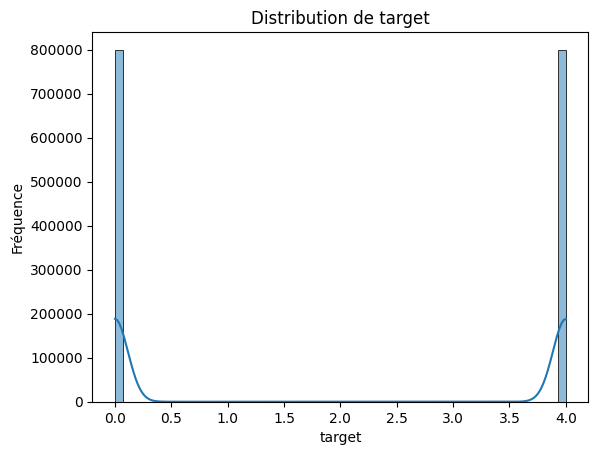

In [2]:
import pandas as pd
data = pd.read_csv(filename, encoding='ISO-8859-1')
plot_data(data,['target'])

In [3]:
# Charger et préparer les données
X_train, X_test, y_train, y_test, vectorizer = prepare_data(filename)

In [4]:
# Entraîner le modèle
model = train_model(X_train, y_train)

/home/maa/ma_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Évaluer le modèle
evaluate_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           4       0.77      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [7]:
model, vectorizer


(LogisticRegression(), TfidfVectorizer())

In [8]:

# Sauvegarder le modèle
#save_model(model, 'sentiment_analysis_model.pkl')

# Exemple de prédiction
tweet = "J'adore utiliser ChatGPT pour l'apprentissage !"
print(predict_sentiment(tweet, model, vectorizer))


Négatif


In [11]:
data.target

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64

In [12]:
from flask import Flask, render_template, request